<a href="https://colab.research.google.com/github/rmonro12/Intro_to_ML/blob/main/Homework_Assignments/HW_5/Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan Monroe (801219572) - 11/10/2025 <br>
ECGR 4105 - Homework 5, Problem 1

###Import Libraries & Prepare dataset

In [4]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import torch

In [5]:
#Import temperature dataset
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [6]:
#Split dataset
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

#Separate into training and validation sets
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

#Normalized datasets
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [11]:
#Define non-linear model
def model(t_u, w2, w1, b):
  return w2 * t_u ** 2 + w1 * t_u + b

w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(train_t_un, w1, w2, b) #train on normalized set

In [8]:
#Define loss function
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c) ** 2
  return squared_diffs.mean()

In [12]:
#Define training loop
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)
    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}")
  return params

In [17]:
#Training parameters
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001 #adjust 0.1 - 0.0001
optimizer = torch.optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 762.2029, Validation loss 286.9559
Epoch 2, Training loss 412.8053, Validation loss 171.4089
Epoch 3, Training loss 226.7675, Validation loss 105.8755
Epoch 500, Training loss 12.0124, Validation loss 5.1522
Epoch 1000, Training loss 9.8727, Validation loss 3.1247
Epoch 1500, Training loss 8.3083, Validation loss 1.7981
Epoch 2000, Training loss 7.1640, Validation loss 0.9613
Epoch 2500, Training loss 6.3265, Validation loss 0.4629
Epoch 3000, Training loss 5.7132, Validation loss 0.1954
Epoch 3500, Training loss 5.2636, Validation loss 0.0827
Epoch 4000, Training loss 4.9334, Validation loss 0.0710
Epoch 4500, Training loss 4.6907, Validation loss 0.1229
Epoch 5000, Training loss 4.5116, Validation loss 0.2125


tensor([ 0.5693, -0.9604, -0.9384], requires_grad=True)

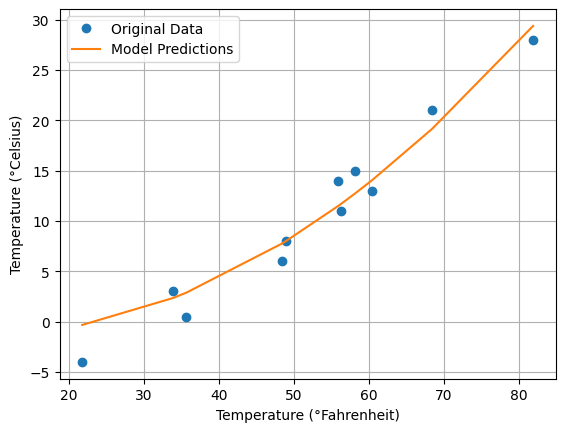

In [19]:
#Plot predicted outputs
plt.xlabel("Temperature (\u00b0Fahrenheit)")
plt.ylabel("Temperature (\u00b0Celsius)")

# Original data points
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Original Data')

# Predicted outputs
t_un_all = 0.1 * t_u # Normalize the full t_u dataset for prediction
t_p_all = model(t_un_all, *params).detach().numpy() # Get predictions and detach from graph

# Sort for smooth plotting (optional, but good practice for lines)
sorted_t_u, sorted_indices = torch.sort(t_u)
sorted_t_p_all = t_p_all[sorted_indices]

plt.plot(sorted_t_u.numpy(), sorted_t_p_all, '-', label='Model Predictions')
plt.legend()
plt.grid(True)
plt.show()